# Project 1: part a) - part e) included. OLS, RIDGE and LASSO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
import importlib
import matplotlib
#matplotlib.rcParams['figure.dpi'] = 300
from tqdm import tqdm
#from modelos import Dataframe, OLS
import modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Noise generator
Function to generate the noise

In [2]:
def noise(l, factor=0.1):
    return np.random.normal(0,factor,l) 

array([-0.01482589, -0.16736996, -0.12679775,  0.05122342, -0.02572662,
        0.2181174 , -0.13256486, -0.13931118,  0.10809931, -0.08748645])

## Create data

Function to create thed ata

In [3]:
def create_data(n):
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    return x, y

## Mean Squared Error

Functions for MSE, R2 score and Mean

In [4]:
def MSE(a, b, correction =True):

    if correction:
        n = len(a) - 1
    else:
        n = len(a)

    return np.sum((a - b)**2)/n

def R2(a, b, correction=True):
    """
    a: predicted values
    b: real values
    """
    mse = MSE(a, b, correction=correction)
    if correction:
        n = len(a) - 1
    else:
        n = len(a)
    
    return 1 - mse/np.sum((a - a.mean())**2)

def mean(a, correction=True):

    if correction:
        n = len(a) - 1
    else:
        n = len(a)

    return np.sum(a)/n



    

## Franke function
Definition of the Franke function

In [5]:
def FrankeFunction(x, y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [6]:
x = np.arange(0,1,0.05)
y = np.arange(0,1,0.05)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x,y)

# Part a)

#### Data generation

0.5129826478725455


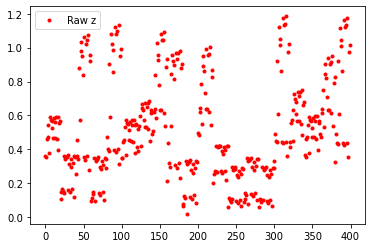

In [7]:
x = np.arange(0,1,0.05)
y = np.arange(0,1,0.05)
x= np.random.uniform(0,1,20)
y = np.random.uniform(0,1,20)

scaler = StandardScaler()

a, b= np.meshgrid(x,y)
x_flat = a.flatten()
y_flat = b.flatten()
z = FrankeFunction(a,b).flatten()
#z = scaler.fit_transform(z.reshape(-1,1))
factor = 0.4
zadd=z+noise(len(z), factor=factor) #added
#zprod = z*noise(len(z), factor=factor) #multiplyed
#datos = np.column_stack((x_flat, y_flat)
plt.plot(z, 'r.', label="Raw z")
#plt.plot(zadd, 'b.', label="Added noise z")
plt.legend()
print(z.mean())

0.4318427404166462


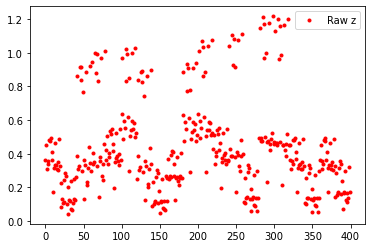

In [8]:
x= np.random.uniform(0,1,20)
y = np.random.uniform(0,1,20)

scaler = StandardScaler()

a, b= np.meshgrid(x,y)
x_flat = a.flatten()
y_flat = b.flatten()
data = modelos.Dataframe(x,y, grid=True)
z = FrankeFunction(a,b).flatten()
#z = scaler.fit_transform(z.reshape(-1,1))
factor = 0.4
zadd=z+noise(len(z), factor=factor) #added
#zprod = z*noise(len(z), factor=factor) #multiplyed
#datos = np.column_stack((x_flat, y_flat)
plt.plot(z, 'r.', label="Raw z")
#plt.plot(zadd, 'b.', label="Added noise z")
plt.legend()
print(z.mean())

## Split and test with no noise data (70%)

I will test, with no noise data, how does affect the spliting of the data in different sizes.

Tested train sizes:  [0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9 ]
MSE:  [0.01581594293180002, 0.015553830056224783, 0.015096470735438664, 0.016988879450098835, 0.01577946987940282, 0.014674431074024028, 0.015120808819200799, 0.01606991057722523, 0.01803910539293649]
R2:  [0.9995194502636575, 0.9994800272193864, 0.9993949432517503, 0.9992011020736947, 0.9991275040417646, 0.9990924215074115, 0.9986756402971415, 0.9983466670631955, 0.997585984062433]
Tested train size:  0.5
MSE:  0.01581594293180002
R2:  0.9995194502636575
--------------------------
Tested train size:  0.55
MSE:  0.015553830056224783
R2:  0.9994800272193864
--------------------------
Tested train size:  0.6000000000000001
MSE:  0.015096470735438664
R2:  0.9993949432517503
--------------------------
Tested train size:  0.6500000000000001
MSE:  0.016988879450098835
R2:  0.9992011020736947
--------------------------
Tested train size:  0.7000000000000002
MSE:  0.01577946987940282
R2:  0.9991275040417646
-------------------

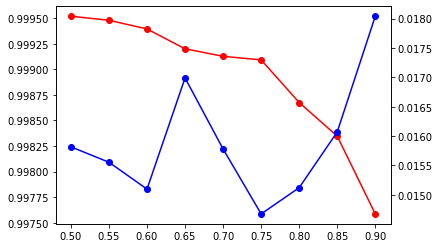

In [9]:
x, y = create_data(1000)
z = FrankeFunction(x,y)
data = modelos.Dataframe(x,y, grid=False)
train_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]
train_sizes = np.arange(0.5,0.95,0.05)
error = []
r2 = []
for i in train_sizes:
    data.split(z, train_size=i)
    model = modelos.OLS()
    model.fit(data.feature_matrix(data=data.x_train),data.y_train)
    predict = model.predict(data.feature_matrix(data=data.x_test))
    error.append(MSE(predict, data.y_test))
    r2.append(R2(predict, data.y_test))

print("Tested train sizes: ", train_sizes)
print("MSE: ", error)
print("R2: ", r2)
for i in range(len(train_sizes)):
    print("Tested train size: ", train_sizes[i])
    print(f"MSE: ", error[i])
    print("R2: ", r2[i])
    print("--------------------------")

"""
plt.plot(train_sizes,r2,"ro-")
plt.plot(train_sizes, error, "bo-")
plt.title("R2 coefficient")
plt.xlabel("Train set size")
plt.xticks(train_sizes)
plt.grid()
"""
fig, ax = plt.subplots(1)
ax.plot(train_sizes, r2,'ro-')
ax2=ax.twinx()
ax2.plot(train_sizes, error,'bo-')

As we can see, an optimal size for the splitting is a train set made of the 70% of the total data. So we will use this value.




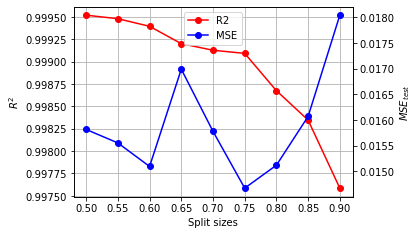

In [11]:
g=0.5
fig, ax = plt.subplots(1, figsize=(g*10,g*7))
lns1 = ax.plot(train_sizes, r2,'ro-', label="R2")
ax2=ax.twinx()
lns2 = ax2.plot(train_sizes, error,'bo-', label="MSE")
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.set_ylabel('$R^2$')
ax2.set_ylabel('$MSE_{test}$')
ax.set_xlabel('Split sizes')
ax.grid()
ax.legend(lns, labs, loc=9)



## NOISE (FACTOR 0.4)

With respect to the noise, we will study the signail-to-noise ratio.

In [12]:
factors = np.arange(0.1,1, 0.1)
ruidos = []
desviacions = []
bruts = noise(l=len(z))   
for i in factors:
    ruidos.append((i*bruts).mean())
    desviacions.append((i*bruts).std())

In [13]:

data = modelos.Dataframe(x,y, grid=False)
#z = FrankeFunction(data.data[:,0], data.y)
#z += noise(l = len(z))
train_size = 0.7
factors = np.arange(0.1,1, 0.1)
error = []
r2 = []
ruido = noise(len(z))
a, b = x, y
for i in factors:
    z = FrankeFunction(a,b)
    z += i*ruido

    data.split(z, train_size=train_size)
    model = modelos.OLS()
    model.fit(data.feature_matrix(data=data.x_train),data.y_train)
    predict = model.predict(data.feature_matrix(data=data.x_test))
    error.append(MSE(predict, data.y_test))
    r2.append(R2(predict, data.y_test))

print("Tested factors: ", factors)
print("MSE: ", error)
print("R2: ", r2)

Tested factors:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
MSE:  [0.01601225460115125, 0.01527292162842803, 0.017649976335685064, 0.019103591267517137, 0.01457703154375071, 0.02156084018314423, 0.020681185514837084, 0.02256886884807772, 0.026369179090426246]
R2:  [0.9991879019578889, 0.9992466130298633, 0.9990308357527368, 0.9990324728671659, 0.9992907517722623, 0.9988467898342482, 0.9990296898830364, 0.9987542721236272, 0.9985011429552245]


Text(0.5, 0, 'Noise factor')

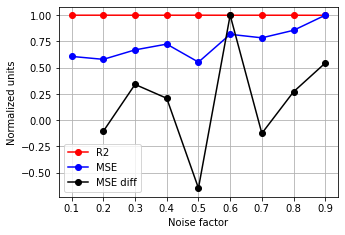

In [14]:

g = 0.5
plt.figure(figsize=(g*10,g*7))
plt.plot(factors,r2/np.max(r2), 'ro-')
plt.plot(factors,error/np.max(error), 'bo-')
#plt.yscale("log")
diff = np.ones((len(r2)-1))

for i in range(len(r2) - 1):
    diff[i] = error[i+1] - error[i]

plt.plot(factors[1:],diff/np.max(diff), "ko-")
plt.legend(["R2","MSE","MSE diff"])
plt.grid()

plt.ylabel('Normalized units')
plt.xlabel('Noise factor')



From this plot we see that the critical point is at a factor 0.5 . After this factor, the MSE difference increases a lot and seems to stabilize, so increases at a constant path. I will use a noise factor of 0.4. 

## SCALING
I will check if the scaling affect the data or not.

In [15]:
factor = 0.4
train_size = 0.7

x = np.arange(0,1,0.05)
y = np.arange(0,1,0.05)
#x= np.random.uniform(0,1,400)
#y = np.random.uniform(0,1,400)
a, b= np.meshgrid(x,y)
z = FrankeFunction(a,b).flatten()

data = modelos.Dataframe(x, y, grid=True)


error_scaled = []
r2_scaled = []
error = []
r2=[]

ruido = noise(len(z), factor=factor)

z = FrankeFunction(a,b).flatten() + ruido

data.split(z, train_size=train_size)



model_scal = modelos.OLS()
model_scal.fit(data.feature_matrix(n=4,data=data.x_train, scaling=True), data.y_train)
predict = model_scal.predict(data.feature_matrix(n=4,data=data.x_test, scaling=True))
error_scaled.append(MSE(predict,data.y_test))
r2_scaled.append(R2(predict, data.y_test))



model = modelos.OLS()
model.fit(data.feature_matrix(n=4,data=data.x_train),data.y_train)
predict = model.predict(data.feature_matrix(n=4,data=data.x_test, scaling=False))
error.append(MSE(predict, data.y_test))
r2.append(R2(predict,data.y_test))

print("MSE:        ",error)
print("MSE scaled: ",  error_scaled)
print("R2:         ",r2)
print("R2 scaled:  ",r2_scaled)

MSE:         [0.1944175605167071]
MSE scaled:  [0.44178139667437427]
R2:          [0.985369315047623]
R2 scaled:   [0.9758147664323983]


### We observe that, for scaled data, the MSE is greater but R2 is similar

We work with feature matrices.

    feat = feature matrix raw data
    feat_scale = feature matrix scaled
    feat2 = feature matrix centered

    
In the next step, we center the data (mu = 0) and compute the standard desviations using SVD. We demonstrate that for scaled data the data is more sparsed than for 
raw data. 
When we do the reescaling, we do it for the feature matrix. In general, this is done to reduce the values and the sparsing of data. In our case, the data coming from the Franke Function is even smaller.

In [16]:
feat_scale = data.feature_matrix(n=4,data=data.x_test, scaling=True)
feat = data.feature_matrix(n=4,data=data.x_test, scaling=False)
medias = np.mean(feat, axis=0)
feat2 = feat - medias[np.newaxis,:]

In [17]:
add = []
for i in range(1,(feat.shape[1] - 1),1):
    print(feat2[:,i].mean())
    add.append(feat_scale[:,i].mean())

print('-------------')
print(np.mean(add))

1.7578531223231644e-17
-8.696747026230393e-17
-6.0137080500529315e-18
1.0824674490095276e-16
1.4802973661668754e-17
-7.956598343146955e-17
-1.0362081563168128e-16
7.401486830834377e-18
-3.3306690738754695e-17
-8.326672684688674e-17
-8.326672684688674e-18
3.7007434154171884e-18
6.106226635438361e-17
-------------
-9.735801908251371e-17


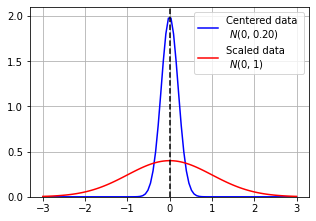

In [18]:
import scipy.stats as stats
mu = 0
#variance = 1
sigma = 0.20
sigma2 = 1
mu2 = 0
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
x2 = np.linspace(mu2 - 3*sigma2, mu2+ 3*sigma2, 100)
yticks = np.arange(0, 2.5, 0.5)
plt.figure(figsize=(g*10,g*7))
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma),'b-', label="Centered data \n $N(0, 0.20)$")
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2),'r-', label="Scaled data \n $N(0, 1)$")
#plt.title("Normal distribution")
plt.ylim([0, 2.1])
plt.yticks(yticks)
plt.axvline(0, color = 'k', linestyle="--")#, linewidth="1")
plt.legend()
plt.grid()
plt.show()

### In the following plot we can see the comparation between the Scaled data and the centered data. 

The squared singular values over n are the autovalues of the covariance matrix. For the Centered data are smaller thant for the Scaler data, what
means a smaller covariance, less sparsed data

[9.35803241e+00 3.66563754e+00 5.08898628e-01 2.14998927e-01
 1.99410964e-01 3.16446056e-02 1.14373945e-02 4.78947255e-03
 3.89462062e-03 8.58381851e-04 2.17308627e-04 1.06390415e-04
 4.01332184e-05 3.32248389e-05]
[5.07443733e-01 2.68932295e-01 2.58415073e-02 1.39676650e-02
 1.28206797e-02 1.28133135e-03 5.56707168e-04 3.10704447e-04
 2.88417700e-04 2.68967774e-05 8.76882378e-06 4.73979605e-06
 2.92177599e-06 2.45557490e-06 0.00000000e+00]


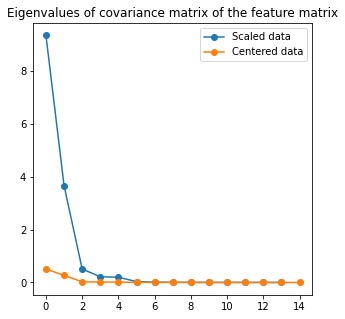

In [71]:
_,epsilon2,_ = np.linalg.svd(feat2)
_,epsilon_scale,_ = np.linalg.svd(feat_scale)
n = len(data.x_test)

print(epsilon_scale**2/n)
print(epsilon2**2/n)
#plt.plot(epsilon/n, "o-")
plt.figure(figsize=(5,5))
plt.plot(epsilon_scale**2/n, "o-", label="Scaled data")
plt.plot(epsilon2**2/n, "o-", label="Centered data")
plt.title("Eigenvalues of covariance matrix of the feature matrix")
plt.legend()

### CONCLUSION: Study the sparsing of the data to know if it is worth to scale it. We will not scale it.

# PART B)

### MSE/MODEL COMPLEXITY PLOT

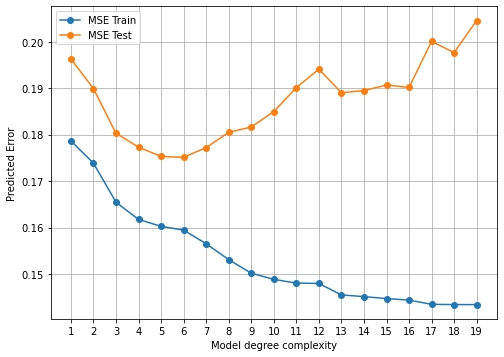

In [71]:
factor = 0.4
train_size = 0.7

x, y = create_data(1000)
z = FrankeFunction(x, y)
z += noise(l = len(z), factor=factor)

data = modelos.Dataframe(x, y, grid=False)
data.split(z, train_size=0.7)


complexity = np.arange(1,20, 1)

mse_test = []
mse_train = []

model = modelos.OLS()

for i in complexity:
    model.fit(data.feature_matrix(n=i, data = data.x_train), data.y_train)
    predict = model.predict(data.feature_matrix(n=i, data=data.x_train))
    mse_train.append(MSE(predict, data.y_train))
    predict = model.predict(data.feature_matrix(n=i, data=data.x_test))
    mse_test.append(MSE(predict, data.y_test))

fig, axs = plt.subplots(1,1,subplot_kw=dict(box_aspect=0.7) ,figsize=(8,8))

axs.plot(complexity, mse_train, 'o-',label="MSE Train")
axs.plot(complexity, mse_test, 'o-',label="MSE Test")
axs.set_ylabel("Predicted Error")
axs.set_xlabel("Model degree complexity")
axs.set_xticks(complexity)
axs.legend()
axs.grid()


The following little code is to run the fit several times, creating new data, to get the best complexity.

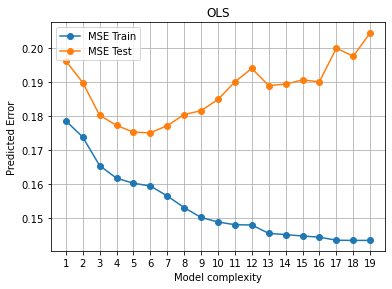

In [73]:
g=0.6
fig, axs = plt.subplots(1,1 ,figsize=(g*10,g*7))

axs.plot(complexity, mse_train, 'o-',label="MSE Train")
axs.plot(complexity, mse_test, 'o-',label="MSE Test")
axs.set_ylabel("Predicted Error")
axs.set_xlabel("Model complexity")
axs.set_title('OLS')
axs.set_xticks(complexity)
#axs.set_xlim([0,11])
axs.legend()
axs.grid()

#plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/OLSTrainVSTest', dpi=300)

In [134]:
from tqdm import tqdm
complexity = np.arange(1,12, 1)
mins=[]
for i in tqdm(range(100)):

    x, y = create_data(1000)
    z = FrankeFunction(x, y)
    z += noise(l = len(z),factor=factor)
    data = modelos.Dataframe(x, y, grid=False)
    data.split(z, train_size=0.7)

    mse_test = []
    mse_train = []

    model = modelos.OLS()

    for i in complexity:
        model.fit(data.feature_matrix(n=i, data = data.x_train), data.y_train)
        predict = model.predict(data.feature_matrix(n=i, data=data.x_train))
        mse_train.append(MSE(predict, data.y_train))
        predict = model.predict(data.feature_matrix(n=i, data=data.x_test))
        mse_test.append(MSE(predict, data.y_test))
    mins.append(mse_test.index(np.min(mse_test)))

print("Best complexity is: ", mean(mins))

100%|██████████| 100/100 [00:04<00:00, 22.83it/s]

Best complexity is:  4.232323232323233


## Bootstrap with only one number of datapoints

In [1055]:
from astropy.stats import bootstrap

#x= np.random.uniform(0,1,10000)
#y = np.random.uniform(0,1,10000)
#z = FrankeFunction(x, y)

#z += noise(l = len(z),factor=factor)

#data = modelos.Dataframe(x, y, grid=False)
#data.split(z, train_size=0.7)

#I create the resampled trains with Bootstrap techinque.
#bootresult is of dimenisons [(x,y,z), datapoints, resamples], where data = [x, y, z], where x and y are the train points and z the real values

resamples = 20
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10 ]
train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
bootresult = bootstrap(train_data, bootnum=resamples).T


errors = np.zeros((resamples,len(degrees),2)) #[resample, degree, MSE_train MSE_test]

for i in range(resamples):
    for j, grado in enumerate(degrees):
        model =modelos.OLS()
        data_aux = modelos.Dataframe(x=bootresult[0,:,i],y=bootresult[1,:,i])
        y_train = bootresult[2,:,i]
        model.fit(data_aux.feature_matrix(n=grado), y=y_train)
        errors[i, j, 0] = MSE(model.predict(data_aux.feature_matrix(n=grado)), y_train)
        errors[i, j, 1] = MSE(model.predict(data.feature_matrix(data=data.x_test, n =grado)), data.y_test)
mean_mse = []
for i in range(len(degrees)):
    mean_mse.append(np.mean(errors[:,i,1]))


#plt.figure(figsize=(20,20))

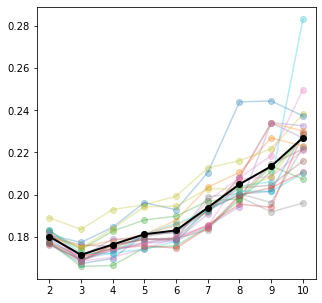

In [1056]:
fig, ax = plt.subplots(1, figsize=(5,5))   
for i in range(resamples):
    
    ax.plot(degrees, errors[i,:,1],  "o-",label=str(i), alpha=0.3)
    #ax.legend()
    
ax.set_xticks(degrees)
ax.plot(degrees, mean_mse,"ko-",  linewidth=2)

In [1060]:
OLS_error_boots = mean_mse[2]

## Bootstrap with 100, 1000, 10000 and 100000 data points

In [209]:
from astropy.stats import bootstrap

datapoints = [100,1000, 10000, 100000]

data_errors = []
data_errors_mean = []
for k in datapoints:

    x= np.random.uniform(0,1,k)
    y = np.random.uniform(0,1,k)
    z = FrankeFunction(x, y)

    z += noise(l = len(z),factor=factor)

    data = modelos.Dataframe(x, y, grid=False)
    data.split(z, train_size=0.7)

    #I create the resampled trains with Bootstrap techinque.
    #bootresult is of dimenisons [resamples, data, points], where data = [x, y, z], where x and y are the train points and z the real values
    resamples = 20
    degrees = [2, 3, 4, 5, 6, 7, 8 ]
    train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
    bootresult = bootstrap(train_data, bootnum=resamples).T


    errors = np.zeros((resamples,len(degrees),2)) #[resample, degree, MSE_train MSE_test]

    for i in range(resamples):
        for j, grado in enumerate(degrees):
            model =modelos.OLS()
            data_aux = modelos.Dataframe(x=bootresult[0,:,i],y=bootresult[1,:,i])
            y_train = bootresult[2,:,i]
            model.fit(data_aux.feature_matrix(n=grado), y=y_train)
            errors[i, j, 0] = MSE(model.predict(data_aux.feature_matrix(n=grado)), y_train)
            errors[i, j, 1] = MSE(model.predict(data.feature_matrix(data=data.x_test, n =grado)), data.y_test)
    mean_mse = []
    for i in range(len(degrees)):
        mean_mse.append(np.mean(errors[:,i,1]))

    data_errors.append(errors)
    data_errors_mean.append(mean_mse)

#plt.figure(figsize=(20,20))

Text(0.5, 0.98, 'MSE_test depending on number of datapoints')

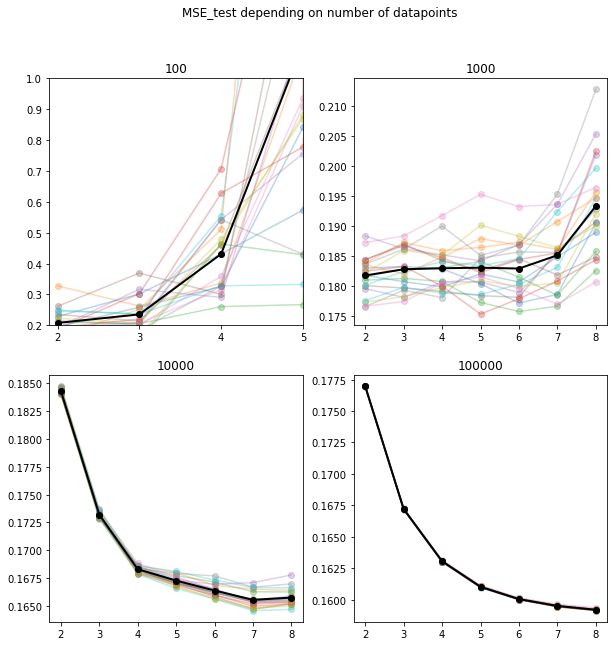

In [32]:
fig, ax = plt.subplots(2,2, figsize=(10,10))   
for i in range(len(datapoints)):
    for j in range(resamples):

        if i/2 <1:
            ax[0,i].plot(degrees, data_errors[i][j, :, 1], "o-", alpha=0.3)
            ax[0,i].set_xticks(degrees)
            ax[0,i].set_title(str(datapoints[i]))
        else:
            ax[1,i-2].plot(degrees, data_errors[i][j, :, 1], "o-", alpha=0.3)
            ax[1,i-2].set_xticks(degrees)
            ax[1, i-2].set_title(str(datapoints[i]))

for i in range(len(data_errors_mean)):
    if i/2 <1:
        ax[0,i].plot(degrees, data_errors_mean[i], "ko-",  linewidth=2)
    else:
        ax[1,i-2].plot(degrees, data_errors_mean[i], "ko-",  linewidth=2)       

ax[0,0].set_xlim([1.9,5])
ax[0,0].set_ylim([0.2,1])
fig.suptitle("OLS MSE_test depending on number of datapoints")

## Bias-Variance tradeoff

I will work with 1000 datapoints in x and y. We perform 100 resamples with bootstraping.

In [250]:
from astropy.stats import bootstrap

#x= np.random.uniform(0,1,10000)
#y = np.random.uniform(0,1,10000)
#x, y = create_data(1000)
#z = FrankeFunction(x, y)
#factor = 0.2
#z += noise(l = len(z),factor=factor)
#data = modelos.Dataframe(x, y, grid=False)
#data.split(z, train_size=0.7)

resamples = 100
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ]
degrees = np.arange(1,12,1)
train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
bootresult = bootstrap(train_data, bootnum=resamples).T

predictions = np.zeros((resamples, len(degrees), len(data.y_test)))

for i in range(resamples):
    for j, grado in enumerate(degrees):
        model = modelos.OLS()
        data_aux = modelos.Dataframe(x=bootresult[0,:,i], y=bootresult[1,:,i])
        y_train = bootresult[2,:,i]
        model.fit(data_aux.feature_matrix(n=grado), y=y_train)
        predictions[i,j,:] = model.predict(data_aux.feature_matrix(data=data.x_test, n=grado))

bias = np.mean((data.y_test - np.mean(predictions, axis=0, keepdims=True))**2, axis=2)
var = np.mean(np.mean((predictions - np.mean(predictions, axis=0, keepdims=True))**2, axis=0), axis=1)
mse = np.mean(np.mean((data.y_test - predictions)**2, axis=-1), axis=0)

Bias:  [[0.16939304 0.16310437 0.1607658  0.15096128 0.15014512 0.15573142
  0.15682269 0.161766   0.1658143  0.17936566 0.19349101]]
------------------------
Variance:  [0.00073807 0.00149981 0.00228043 0.00359901 0.00464863 0.0063732
 0.00879976 0.01375006 0.01614677 0.01992327 0.03205781]
------------------------
Bias + variance:  [[0.17013111 0.16460419 0.16304623 0.15456029 0.15479375 0.16210462
  0.16562245 0.17551606 0.18196106 0.19928893 0.22554882]]
------------------------
MSE test [0.17013111 0.16460419 0.16304623 0.15456029 0.15479375 0.16210462
 0.16562245 0.17551606 0.18196106 0.19928893 0.22554882]


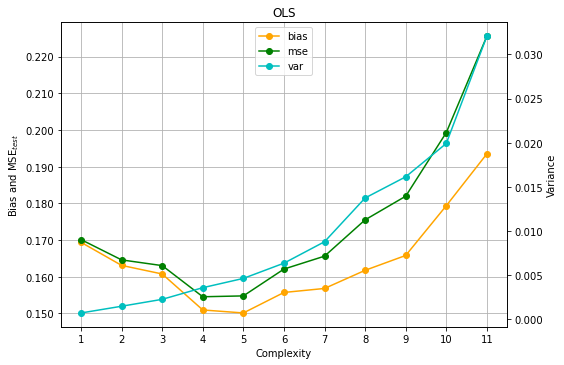

In [252]:
print("Bias: ",bias)
print("------------------------")
print("Variance: ",var)
print("------------------------")
print("Bias + variance: ",bias + var )
print("------------------------")
print("MSE test", mse)

g=0.8
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))
lns1 = ax.plot(degrees, bias[0,:],"o-", color="orange", label="bias")
lns2 = ax.plot(degrees, mse,"go-", label="mse")
ax2=ax.twinx()
lns3 = ax2.plot(degrees, var,"co-" ,label="var")
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.set_xlabel("Complexity")
ax.set_ylabel("Bias and $\mathrm{MSE}_{test}$")
ax2.set_ylabel("Variance")
ax.legend(lns, labs, loc=9)
ax.set_xticks(degrees)
ax.grid()

ax.set_title("OLS")
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.03f'))


plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/OLSbiasvariance', dpi=300)

# PART C)

For the cross validation, we first reshuffle the data and, then, we divide it into k slots

In [9]:
from sklearn.utils import shuffle


In [7]:
#Function to compute the slots for the cross-validation

def data_slots(x, z, k_folds):

    if len(x)%k_folds != 0:
        print("Number k_folds must be divisor of len(x)")
        return
    #we stack the data and shuffle the data
    data = np.column_stack((x, z))
    data = shuffle(data)
    #we divide data into k slots. Returns an array [samples per slot, (x, y, z), number of slot]
    data = data.reshape((k_folds, int(data.shape[0]/k_folds), data.shape[1])).transpose(1,2,0)
    return data
    

Code for only one number of folder

In [10]:
#we create the data

x= np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)

x,y = create_data(1000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)

#we create the slots
k = 100
slots = data_slots(data.data, z, k)


n = 7 #model degree
mse_test = []

#loop to compute the mse_test for each slot
for i in range(k):
    aux_train = np.delete(slots, i, axis=2)
    aux_test = slots[:,:,i]

    #reshape of aux_train in [samples, (x,y,z)]. We flat the slots into a 2D vector to train the model
    aux_train = aux_train.transpose(2,0,1).reshape(aux_train.shape[-1]*aux_train.shape[0], -1)
    #create dataframe with training data and model
    aux_data = modelos.Dataframe(aux_train[:,:2])
    aux_model = modelos.OLS()
    #fitting of the aux_model
    aux_model.fit(feature_matrix=aux_data.feature_matrix(n=n), y=aux_train[:,-1])
    #predict of the aux_model
    predict = aux_model.predict(feature_matrix=aux_data.feature_matrix(data=aux_test[:,:2],n=n))
    #computation of the mse_test
    mse_test.append(MSE(predict, aux_test[:,-1]))
   

Code for more number of folders. We can only use divisors in order to full all the folders.
I compute it 20 times in order to get the general tendency.

In [63]:


x,y = create_data(1000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)


k = np.arange(10,110,10)
n=5
k = [2,4,5,8,10,20,25,40,50]
mse_20 = []
for i in range(100):
    mse_test=[]
    for folds in k:
        
        slots = data_slots(data.data, z, folds)
        aux_mse_test = []
        for i in range(folds):
            aux_train = np.delete(slots, i, axis=2)
            aux_test = slots[:,:,i]

            #reshape of aux_train in [samples, (x,y,z)]. We flat the slots into a 2D vector to train the model
            aux_train = aux_train.transpose(2,0,1).reshape(aux_train.shape[-1]*aux_train.shape[0], -1)
            #create dataframe with training data and model
            aux_data = modelos.Dataframe(aux_train[:,:2])
            aux_model = modelos.OLS()
            #fitting of the aux_model
            aux_model.fit(feature_matrix=aux_data.feature_matrix(n=n), y=aux_train[:,-1])
            #predict of the aux_model
            predict = aux_model.predict(feature_matrix=aux_data.feature_matrix(data=aux_test[:,:2],n=n))
            #computation of the mse_test#
            aux_mse_test.append(MSE(predict, aux_test[:,-1]))

        mse_test.append(np.mean(aux_mse_test))
    mse_20.append(mse_test)


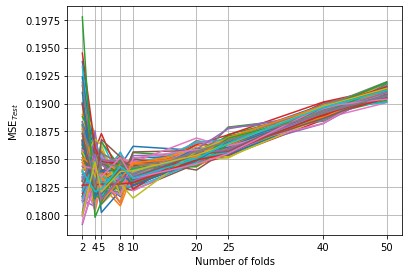

In [64]:
g=0.6
fig, axs = plt.subplots(1,1 ,figsize=(g*10,g*7))

mse_20 = np.array(mse_20)
for i in range(mse_20.shape[0]):
    axs.plot(np.array(k),mse_20[i,:])
axs.set_xticks(np.array(k))
axs.set_xlabel('Number of folds')
axs.set_ylabel('$\mathrm{MSE}_{Test}$')
axs.grid()
#plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/OLS_CrossVal_100', dpi=300)

(100, 9)


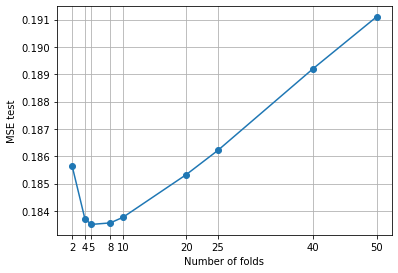

In [65]:
print(mse_20.shape)
mse20_mean = np.mean(mse_20, axis=0)

g=0.6
fig, axs = plt.subplots(1,1 ,figsize=(g*10,g*7))
axs.plot(np.array(k),mse20_mean,"o-")

axs.set_xticks(np.array(k))
#axs.set_title("MSE_test in function of number of folds for cross-validation")
axs.set_xlabel("Number of folds")
axs.set_ylabel("MSE test")
axs.grid()

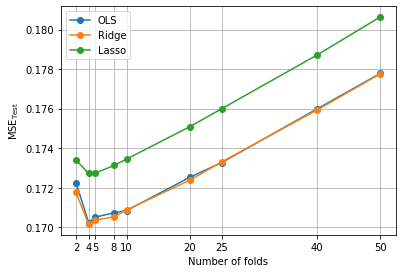

In [62]:
g=0.6
fig, axs = plt.subplots(1,1 ,figsize=(g*10,g*7))

axs.plot(np.array(k), CV_OLS, 'o-', label='OLS')
axs.plot(np.array(k), CV_RIDGE, 'o-', label='Ridge')
axs.plot(np.array(k), CV_LASSO[0,:], 'o-', label='Lasso')
axs.set_xticks(np.array(k))
axs.legend()
axs.set_xlabel("Number of folds")
axs.set_ylabel("$\mathrm{MSE_{Test}}$")
axs.grid()

plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/CrossVal', dpi=300)

From this plot, we can see that the optimal number of folds is k = 4/5

In [1134]:
OLS_error_crossval = mse20_mean.min()

## Comparision of bootstrap and cross-validation

We compute the MSE for Cross and Bootstrap for 10000 datapoints and various degrees if complexity. We get a lower value always for cross_validation.

In [242]:

x, y = create_data(10000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)

In [247]:
data = modelos.Dataframe(x, y, grid=False)
data.split(z, train_size=0.7)

degrees = [ 2,  3,  4,  5,  6,  7,  8,  9, 10]
resamples = 100
n=8

boot = []
cross = []
#BOOTSTRAP
for i in degrees:
    train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
    bootresult = bootstrap(train_data, bootnum=resamples).T

    errors = np.zeros((resamples,len(degrees),2)) #[resample, degree, MSE_train MSE_test]
    mse_bootstrap = []
    for i in range(resamples):
        model = modelos.OLS()
        data_aux = modelos.Dataframe(x=bootresult[0,:,i],y=bootresult[1,:,i])
        y_train = bootresult[2,:,i]
        model.fit(data_aux.feature_matrix(n=grado), y=y_train)
        mse_bootstrap.append(MSE(model.predict(data.feature_matrix(data=data.x_test, n =grado)), data.y_test))
    mse_bootstrap = np.mean(mse_bootstrap)
    boot.append(mse_bootstrap)
    #CROSS-VALIDATION

    k = 8
    slots = data_slots(data.data, z, k)
    mse_cv = []

    #loop to compute the mse_test for each slot
    for i in range(k):
        aux_train = np.delete(slots, i, axis=2)
        aux_test = slots[:,:,i]

        #reshape of aux_train in [samples, (x,y,z)]. We flat the slots into a 2D vector to train the model
        aux_train = aux_train.transpose(2,0,1).reshape(aux_train.shape[-1]*aux_train.shape[0], -1)
        #create dataframe with training data and model
        aux_data = modelos.Dataframe(aux_train[:,:2])
        aux_model = modelos.OLS()
        #fitting of the aux_model
        aux_model.fit(feature_matrix=aux_data.feature_matrix(n=n), y=aux_train[:,-1])
        #predict of the aux_model
        predict = aux_model.predict(feature_matrix=aux_data.feature_matrix(data=aux_test[:,:2],n=n))
        #computation of the mse_test
        mse_cv.append(MSE(predict, aux_test[:,-1]))
    mse_cv = np.mean(mse_cv)
    cross.append(mse_cv)
#print(f"MSE Bootstrap {mse_bootstrap} \n MSE Cross val {mse_cv}")
print(f"MSE Bootstrap {boot} \n MSE Cross val {cross}")

MSE Bootstrap [0.16354720529471706, 0.16346167094919686, 0.16353140598503305, 0.16339272964880133, 0.16337844274284424, 0.16355822790050534, 0.16363302009410632, 0.16359337112218778, 0.16353231815897246] 
 MSE Cross val [0.1607248138165068, 0.16069055512302577, 0.16080216306191747, 0.16062956606044776, 0.16048640077692727, 0.16083166242381183, 0.1608727452273194, 0.16068184633886973, 0.16067000555804034]


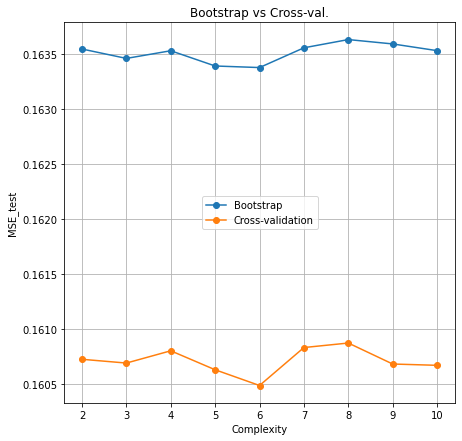

In [283]:
fig, ax = plt.subplots(1, figsize=(7,7))
ax.plot(degrees, boot, "o-",label="Bootstrap")
ax.plot(degrees, cross,"o-" ,label="Cross-validation")
ax.set_ylabel("MSE_test")
ax.set_xlabel("Complexity")
ax.set_title("Bootstrap vs Cross-val.")
ax.grid()
ax.legend(loc=10)


We get a lower MSE with cross val technique.

# Part d)

### Create data

In [7]:
x, y = create_data(1000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)
data.split(z)

### Ridge in function of lambda

Text(0.5, 1.0, 'n = 4')

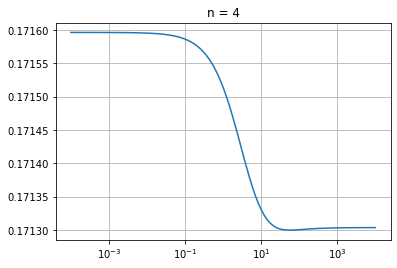

In [1066]:
complexity = 4
ridge = modelos.Ridge()
ols = modelos.OLS()
feat_train = data.feature_matrix(data=data.x_train,n=complexity)
feat_test = data.feature_matrix(data=data.x_test, n=complexity)

lambdas = [ 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lambdas = np.logspace(-4,4,num=100)

mse_lambdas = np.zeros_like(lambdas)
for i, val in enumerate(lambdas):
    ridge.fit(feature_matrix=feat_train,y=data.y_train, l=val)
    ridge_pred=ridge.predict(feat_test)
    mse_lambdas[i] = MSE(ridge_pred, data.y_test)

plt.plot(lambdas,mse_lambdas,"-")
plt.xscale("log")
plt.grid()
plt.title("n = "+str(complexity))

In [1070]:
RIDGE_error = np.min(mse_lambdas)

## Ridge in function of complexity and lambda

In the following code, I compute the MSE_test in function of the complexity of the model and lambda. We observe that, for diffeent degrees, we get
different shapes. The plot showed are the mse in function of the lambda parameter for each degree z-scaled, in order to be able to compare the shapes. We will use degree 8.

In [8]:
degrees = np.arange(2,10,1)
lambdas = np.logspace(-4,4,num=100)
ridge = modelos.Ridge()
ols = modelos.OLS()

mse_total = np.zeros((len(degrees), len(lambdas)))
for j, complexity in enumerate(degrees):
    feat_train = data.feature_matrix(data=data.x_train,n=complexity)
    feat_test = data.feature_matrix(data=data.x_test, n=complexity)

    mse_lambdas = np.zeros_like(lambdas)
    for i, val in enumerate(lambdas):
        ridge.fit(feature_matrix=feat_train,y=data.y_train, l=val)
        ridge_pred=ridge.predict(feat_test)
        mse_lambdas[i] = MSE(ridge_pred, data.y_test)
    
    mse_total[j ,:] = mse_lambdas[:] 



### BREAK

In [75]:
x, y = create_data(1000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)
data.split(z)

In [114]:
degrees = 5
lambdas = np.logspace(-4,1,num=100)
ridge = modelos.Ridge()

feat_train = data.feature_matrix(data=data.x_train,n=degrees)
feat_test = data.feature_matrix(data=data.x_test, n=degrees)

"""
mse_test = np.zeros(len(lambdas))
mse_train = np.zeros(len(lambdas))
mse_test_lasso = np.zeros(len(lambdas))
mse_train_lasso = np.zeros(len(lambdas))
for i, val in enumerate(lambdas):
    ridge.fit(feature_matrix=feat_train, y=data.y_train, l=val)
    ridge_pred = ridge.predict(feat_test)
    mse_test[i] = MSE(ridge_pred, data.y_test)

    #lasso = linear_model.Lasso(alpha=val)
    #lasso.fit(X=feat_train, y=data.y_train)
    #lasso_pred = lasso.predict(feat_test)
    #lasso_pred_train = lasso.predict(feat_train)
    #mse_test_lasso[i] = MSE(lasso_pred, data.y_test)
    #mse_train_lasso[i] = MSE(lasso_pred_train, data.y_train)

"""

degrees = np.arange(1,12,1)
MSE_TEST = np.zeros((len(degrees), 100))
MSE_TRAIN = np.zeros((len(degrees), 100))
for ko in range(100):
    x, y = create_data(1000)
    factor = 0.4

    z0 = FrankeFunction(x, y)
    z = z0 + noise(l = len(z0),factor=factor)
    data = modelos.Dataframe(x, y)
    data.split(z)


    mse_test = np.zeros(len(degrees))
    mse_train = np.zeros(len(degrees))
    for i, val in enumerate(degrees):
        feat_train = data.feature_matrix(data=data.x_train,n=val)
        feat_test = data.feature_matrix(data=data.x_test, n=val)
        ridge.fit(feature_matrix=feat_train, y=data.y_train, l=0)
        ridge_pred = ridge.predict(feat_train)
        mse_train[i] = MSE(ridge_pred, data.y_train)
        ridge_pred = ridge.predict(feat_test)
        mse_test[i] = MSE(ridge_pred, data.y_test)
    MSE_TRAIN[:, ko] = mse_train
    MSE_TEST[:, ko] = mse_test

"""
degrees = np.arange(1,12,1)
MSE_TEST = np.zeros((len(degrees), 100))
MSE_TRAIN = np.zeros((len(degrees), 100))
for ko in range(100):
    x, y = create_data(1000)
    factor = 0.4

    z0 = FrankeFunction(x, y)
    z = z0 + noise(l = len(z0),factor=factor)
    data = modelos.Dataframe(x, y)
    data.split(z)


    mse_test_lasso = np.zeros(len(degrees))
    mse_train_lasso = np.zeros(len(degrees))
    for i, val in enumerate(degrees):
        feat_train = data.feature_matrix(data=data.x_train,n=val)
        feat_test = data.feature_matrix(data=data.x_test, n=val)
        lasso = linear_model.Lasso(alpha=0.001)
        lasso.fit(X=feat_train, y=data.y_train)
        lasso_pred = lasso.predict(feat_test)
        lasso_pred_train = lasso.predict(feat_train)
        mse_test_lasso[i] = MSE(lasso_pred, data.y_test)
        mse_train_lasso[i] = MSE(lasso_pred_train, data.y_train)
    MSE_TRAIN[:, ko] = mse_train_lasso
    MSE_TEST[:, ko] = mse_test_lasso

""" 

'\ndegrees = np.arange(1,12,1)\nMSE_TEST = np.zeros((len(degrees), 100))\nMSE_TRAIN = np.zeros((len(degrees), 100))\nfor ko in range(100):\n    x, y = create_data(1000)\n    factor = 0.4\n\n    z0 = FrankeFunction(x, y)\n    z = z0 + noise(l = len(z0),factor=factor)\n    data = modelos.Dataframe(x, y)\n    data.split(z)\n\n\n    mse_test_lasso = np.zeros(len(degrees))\n    mse_train_lasso = np.zeros(len(degrees))\n    for i, val in enumerate(degrees):\n        feat_train = data.feature_matrix(data=data.x_train,n=val)\n        feat_test = data.feature_matrix(data=data.x_test, n=val)\n        lasso = linear_model.Lasso(alpha=0.001)\n        lasso.fit(X=feat_train, y=data.y_train)\n        lasso_pred = lasso.predict(feat_test)\n        lasso_pred_train = lasso.predict(feat_train)\n        mse_test_lasso[i] = MSE(lasso_pred, data.y_test)\n        mse_train_lasso[i] = MSE(lasso_pred_train, data.y_train)\n    MSE_TRAIN[:, ko] = mse_train_lasso\n    MSE_TEST[:, ko] = mse_test_lasso\n\n'

In [116]:
MSE_TEST = np.mean(MSE_TEST, axis=1)
MSE_TRAIN = np.mean(MSE_TRAIN, axis=1)

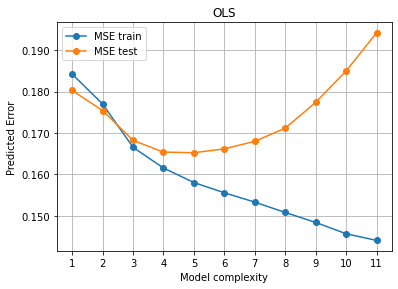

In [119]:
import matplotlib.ticker as ticker

g=0.6
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))

ax.plot(degrees, MSE_TRAIN, 'o-',label ='MSE train')
ax.plot(degrees, MSE_TEST,'o-', label='MSE test')
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))
ax.set_xlabel("Model complexity")
ax.set_ylabel('Predicted Error')
ax.set_xticks(degrees)
ax.set_title('OLS')
ax.legend()
ax.grid()
#plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/OLSTrainVSTest', dpi=300)
#plt.xlim([-0.01,0.01])

### BREAK

In [ ]:


lambdas = np.logspace(-5,5,num=20)
lambdas = np.array([0.0001])
degrees = np.arange(2,11,1)
mse_lambdas_lasso = np.zeros((len(lambdas), len(degrees)))
mse_train_lambdas_lasso = np.zeros((len(lambdas), len(degrees)))
mse_test_ridge = np.zeros((len(lambdas),len(degrees)))
mse_train_ridge = np.zeros((len(lambdas),len(degrees)))
mse_test_ols = np.zeros_like(degrees)
for j, comp in enumerate(degrees):
    feat_train = data.feature_matrix(data=data.x_train,n=comp)
    feat_test = data.feature_matrix(data=data.x_test, n=comp)
    for i, val in enumerate(lambdas):
        lasso = linear_model.Lasso(alpha = val)
        lasso.fit(X=feat_train,y=data.y_train)
        lasso_pred=lasso.predict(feat_test)
        lasso_pred_train=lasso.predict(feat_train)
        mse_lambdas_lasso[i,j] = MSE(lasso_pred, data.y_test)
        mse_train_lambdas_lasso[i,j] = MSE(lasso_pred_train, data.y_train)

        ridge = modelos.Ridge()
        ridge.fit(feature_matrix=feat_train,y=data.y_train, l=val)
        ridge_pred=ridge.predict(feat_test)
        ridge_pred_train=ridge.predict(feat_train)
        mse_test_ridge[i,j] = MSE(ridge_pred, data.y_test)
        mse_train_ridge[i,j] = MSE(ridge_pred_train, data.y_train)
    ols = modelos.OLS()
    ols.fit(feature_matrix=feat_train, y=data.y_train)
    predict = ols.predict(feature_matrix=feat_test)
    mse_test_ols[j]= MSE(predict, data.y_test)

Text(0, 0.5, 'z-scaled MSE_test')

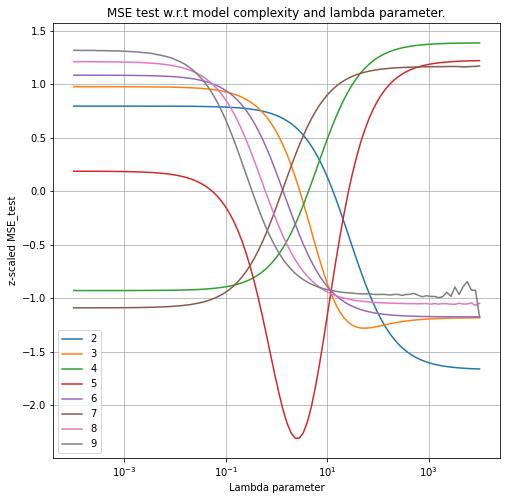

In [9]:
scaler = StandardScaler()
matrix = scaler.fit_transform(mse_total.T).T
plt.figure(figsize=(8,8))
for i in range(mse_total.shape[0]):
    plt.plot(lambdas, matrix[i,:])

plt.legend(degrees)
plt.xscale("log")
plt.grid()
plt.title("MSE test w.r.t model complexity and lambda parameter.")
plt.xlabel("Lambda parameter")
plt.ylabel("z-scaled MSE_test")

#plt.xticks(lambdas)

Text(0, 0.5, 'MSE_test')

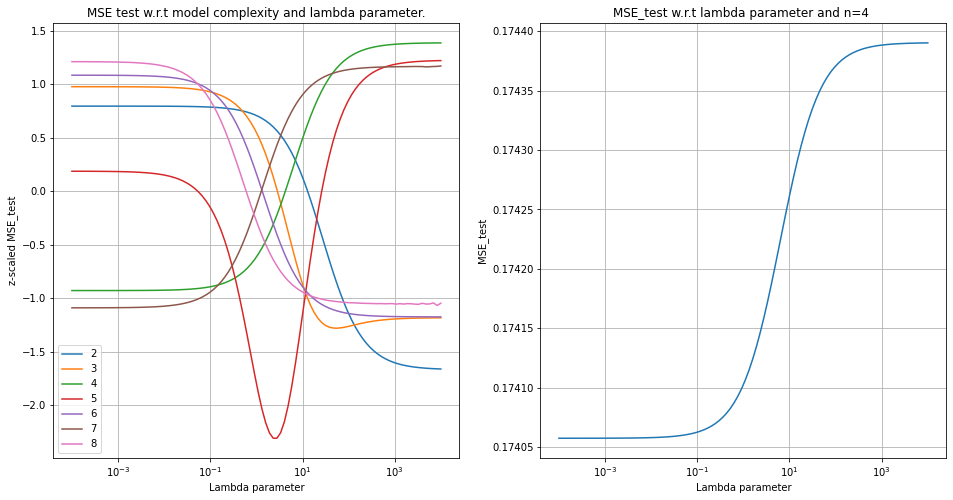

In [10]:
fig, ax = plt.subplots(1,2, figsize=((16,8)))
for i in range(mse_total.shape[0] - 1):
    ax[0].plot(lambdas, matrix[i,:])
ax[0].legend(degrees)
ax[0].set_xscale("log")
ax[0].grid()
ax[0].set_title("MSE test w.r.t model complexity and lambda parameter.")
ax[0].set_xlabel("Lambda parameter")
ax[0].set_ylabel("z-scaled MSE_test")
ax[1].plot(lambdas, mse_total[2,:])
ax[1].set_xscale("log")
ax[1].grid()
ax[1].set_title("MSE_test w.r.t lambda parameter and n=4 ")
ax[1].set_xlabel("Lambda parameter")
ax[1].set_ylabel("MSE_test")

### Ridge vs OLS

In [611]:
complexity = 8
ridge = modelos.Ridge()
ols = modelos.OLS()
feat_train = data.feature_matrix(data=data.x_train,n=complexity)
feat_test = data.feature_matrix(data=data.x_test, n=complexity)

ols.fit(feature_matrix=feat_train,y=data.y_train)
ridge.fit(feature_matrix=feat_train,y=data.y_train, l=100)

ridge_pred=ridge.predict(feat_test)
ols_pred=ols.predict(feat_test)

mse_ridge = MSE(ridge_pred, data.y_test)
mse_ols = MSE(ols_pred, data.y_test)
print("Comparision for complexity=8 and lambda=100. This value comes for the previous plot:")
print("mse_ridge: ", mse_ridge)
print("mse_ols:   ",mse_ols)

Comparision for complexity=8 and lambda=100. This value comes for the previous plot:
mse_ridge:  0.16375452102864108
mse_ols:    0.16387525696493782


### Ridge Bootstrap only one lambda

In [472]:
#x,y = create_data(10000)
#factor = 0.4

#z0 = FrankeFunction(x, y)
#z = z0 + noise(l = len(z0),factor=factor)
#data = modelos.Dataframe(x, y)

datapoints = [100,1000, 10000, 100000]

lambda_value = 100

data_errors = []
data_errors_mean = []
for k in datapoints:

    x= np.random.uniform(0,1,k)
    y = np.random.uniform(0,1,k)
    z = FrankeFunction(x, y)

    z += noise(l = len(z),factor=factor)

    data = modelos.Dataframe(x, y, grid=False)
    data.split(z, train_size=0.7)

    #I create the resampled trains with Bootstrap techinque.
    #bootresult is of dimenisons [resamples, data, points], where data = [x, y, z], where x and y are the train points and z the real values
    resamples = 20
    degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10 ]
    train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
    bootresult = bootstrap(train_data, bootnum=resamples).T


    errors = np.zeros((resamples,len(degrees),2)) #[resample, degree, MSE_train MSE_test]

    for i in range(resamples):
        for j, grado in enumerate(degrees):
            model =modelos.Ridge()
            data_aux = modelos.Dataframe(x=bootresult[0,:,i],y=bootresult[1,:,i])
            y_train = bootresult[2,:,i]
            model.fit(data_aux.feature_matrix(n=grado), y=y_train, l=lambda_value)
            errors[i, j, 0] = MSE(model.predict(data_aux.feature_matrix(n=grado)), y_train)
            errors[i, j, 1] = MSE(model.predict(data.feature_matrix(data=data.x_test, n =grado)), data.y_test)
    mean_mse = []
    for i in range(len(degrees)):
        mean_mse.append(np.mean(errors[:,i,1]))

    data_errors.append(errors)
    data_errors_mean.append(mean_mse)
    

Text(0.05, 0.5, 'Ridge MSE test')

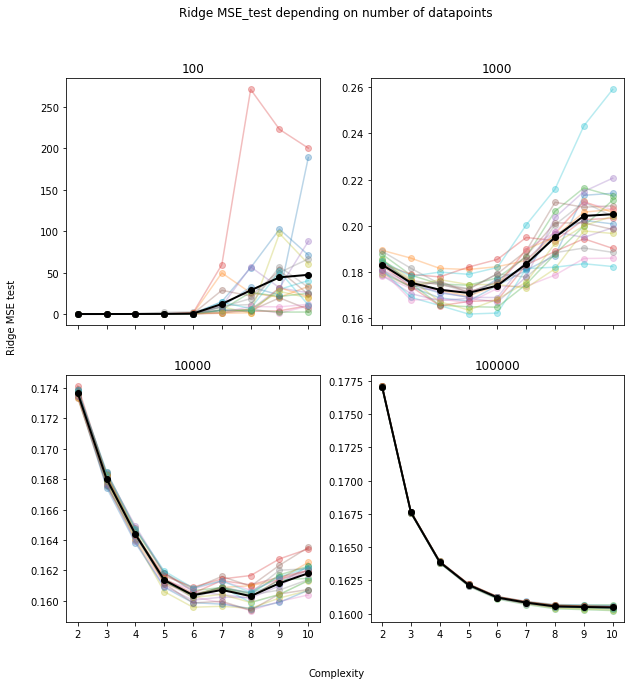

In [596]:
fig, ax = plt.subplots(2,2, sharex=True,figsize=(10,10))   
for i in range(len(datapoints)):
    for j in range(resamples):

        if i/2 <1:
            ax[0,i].plot(degrees, data_errors[i][j, :, 1], "o-", alpha=0.3)
            ax[0,i].set_xticks(degrees)
            ax[0,i].set_title(str(datapoints[i]))
            
        else:
            ax[1,i-2].plot(degrees, data_errors[i][j, :, 1], "o-", alpha=0.3)
            ax[1,i-2].set_xticks(degrees)
            ax[1, i-2].set_title(str(datapoints[i]))

for i in range(len(data_errors_mean)):
    if i/2 <1:
        ax[0,i].plot(degrees, data_errors_mean[i], "ko-",  linewidth=2)
    else:
        ax[1,i-2].plot(degrees, data_errors_mean[i], "ko-",  linewidth=2)       

#ax[0,0].set_xlim([1.9,5])
#ax[0,0].set_ylim([0.2,1])

fig.suptitle("Ridge MSE_test depending on number of datapoints")
fig.text(0.5,0.05,"Complexity", ha="center")
fig.text(0.05,0.5,"Ridge MSE test", ha="center", rotation="vertical")
#plt.xlabel("Complexity")


In [600]:
for i in range(len(data_errors)):
    print(data_errors_mean[i][-3])


28.741818190730545
0.19505659670756562
0.1603150298798281
0.16053938335520535


### Ridge Bootstrap various lambdas and 10000 datapoints

In [613]:
#x, y = create_data(10000)
#factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)
data.split(z)

In [1076]:
resamples = 20
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10 ]
train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
bootresult = bootstrap(train_data, bootnum=resamples).T

lambdas = np.logspace(-4,4,num=10)
lambdas = np.array([100])

## We compute the mean error for the boostraps for various lambdas and complexities.
errors = np.zeros((resamples,len(degrees),2, len(lambdas))) #[resample, degree, MSE_train MSE_test]
mean_mse = np.zeros((len(lambdas), len(degrees))) #[lambdas, degrees]
for k, lambda_value in enumerate(lambdas):
    for i in range(resamples):
        for j, grado in enumerate(degrees):
            model =modelos.Ridge()
            data_aux = modelos.Dataframe(x=bootresult[0,:,i],y=bootresult[1,:,i])
            y_train = bootresult[2,:,i]
            model.fit(data_aux.feature_matrix(n=grado), y=y_train, l=lambda_value)
            errors[i, j, 0, k] = MSE(model.predict(data_aux.feature_matrix(n=grado)), y_train)
            errors[i, j, 1, k] = MSE(model.predict(data.feature_matrix(data=data.x_test, n =grado)), data.y_test)


    for i in range(len(degrees)):
        mean_mse[k, i] = np.mean(errors[:,i,1])
        #mean_mse.append(np.mean(errors[:,i,1]))

    

In [1082]:
RIDGE_error_boot = mean_mse[0,2]

In [618]:
ols = modelos.OLS()
ols.fit(feature_matrix=data.feature_matrix(data=data.x_train,n=8), y=data.y_train)
pred = ols.predict(feature_matrix=data.feature_matrix(data=data.x_test,n=8))
mse_ols = MSE(pred, data.y_test)

0.16092810000838234


Text(0.5, 0, 'Complexity')

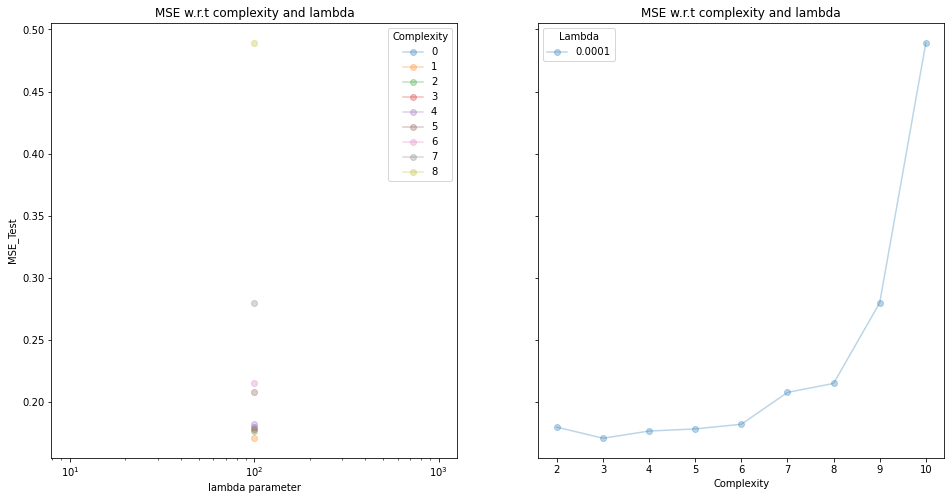

In [1078]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(16,8), sharey=True)   
for i in range(len(degrees)):
    
    ax.plot(lambdas,mean_mse[:, i],  "o-",label=str(i), alpha=0.3)
    ax.legend(title="Complexity")
    
ax.set_xticks(lambdas)
ax.set_xscale("log")
ax.set_title("MSE w.r.t complexity and lambda")
ax.set_xlabel("lambda parameter")
ax.set_ylabel("MSE_Test")



for i in range(len(lambdas)):
    
    ax1.plot(degrees,mean_mse[ i, :],  "o-",label=lmb[i], alpha=0.3)
    ax1.legend(title="Lambda")

ax1.set_xticks(degrees)
ax1.set_title("MSE w.r.t complexity and lambda")
ax1.set_xlabel("Complexity")

    

From this result we see the effect of lambda. As y'=B*X, and Lambda only changes B, the change in lambda only changes the slope. MIRAR OBSIDIAN PER A MES

### Bias-variance tradeoff for lambdas 0.01, 0.1, 1, 10

In [1049]:
x,y = create_data(1000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)
data.split(z, train_size=0.7)
lambdas = np.array([0.0001, 0.1, 1, 10])


In [ ]:

resamples = 100
degrees = [1,2, 3, 4, 5, 6, 7, 8, 9, 10,11 ]
#degrees = np.arange(2,20,1)
train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
bootresult = bootstrap(train_data, bootnum=resamples).T
lambdas = np.array([0.17])

predictions = np.zeros((resamples, len(degrees), len(data.y_test)))

bias_ridge = np.zeros((len(lambdas), len(degrees)))
var_ridge = np.zeros((len(lambdas), len(degrees)))
mse_ridge = np.zeros((len(lambdas), len(degrees)))


for k, val in enumerate(lambdas):
    for i in range(resamples):
        for j, grado in enumerate(degrees):
            model = modelos.Ridge()
            data_aux = modelos.Dataframe(x=bootresult[0,:,i], y=bootresult[1,:,i])
            y_train = bootresult[2,:,i]
            model.fit(data_aux.feature_matrix(n=grado), y=y_train, l=val)
            predictions[i,j,:] = model.predict(data_aux.feature_matrix(data=data.x_test, n=grado))

    bias = np.mean((data.y_test - np.mean(predictions, axis=0, keepdims=True))**2, axis=2)
    var = np.mean(np.mean((predictions - np.mean(predictions, axis=0, keepdims=True))**2, axis=0), axis=1)
    mse = np.mean(np.mean((data.y_test - predictions)**2, axis=-1), axis=0)

    bias_ridge[k,:] = bias
    var_ridge[k,:] = var
    mse_ridge[k, :] = mse

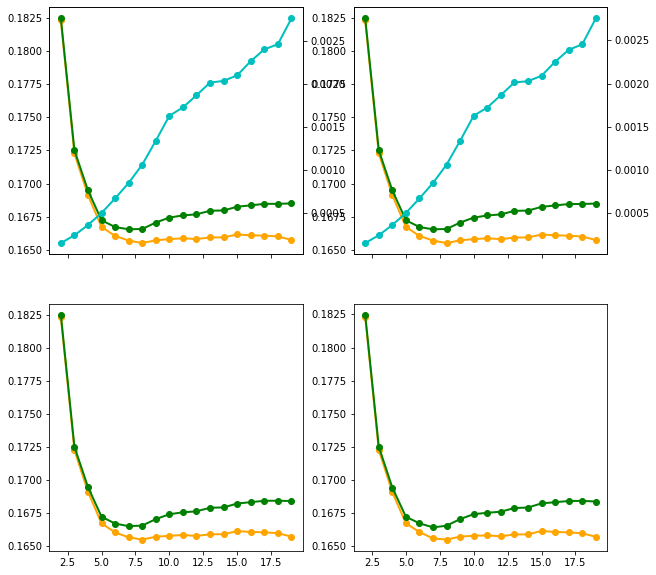

In [917]:
fig, ax = plt.subplots(2,2, sharex=True,figsize=(10,10))   

for i in range(len(lambdas)):
    if i/2 <1:
        lns1=ax[0,i].plot(degrees, bias_ridge[i,:], "o-",color="orange",  linewidth=2)
        lns2=ax[0,i].plot(degrees, mse_ridge[i,:], "o-",color="green",  linewidth=2)
        ax2=ax[0,i].twinx()
        lns3 = ax2.plot(degrees, var_ridge[i,:],"co-" ,label="var", linewidth=2)

    else:
        ax[1,i-2].plot(degrees, bias_ridge[i,:],"o-",color="orange",  linewidth=2) 
        ax[1,i-2].plot(degrees, mse_ridge[i,:], "o-",color="green",  linewidth=2) 

I am not finishing this plot because is useless. The bias-variance change so little depending on lambda that is not appreciable in the plot.
My idea here is to show a plot and values for one random lambda, and then show the std between bias, var and mse for same degree and different lambdas to
show that the difference is very little, third decimal place.
The best thing is to show a numerical result.

We have computed the std of the three magnitudes for the different lambdas for all the degrees of complexity and, in all the cases, the difference between different lambdas
is of the order of 5 or more O(5).

In [690]:
for i in range(len(lambdas)):
    for j in range(len(degrees)):
        print("lambda = ", lambdas[i]," and degree = ", degrees[j])
        print("Bias: ", np.std(bias_ridge[:, j]))
        print("Var: ", np.std(var_ridge[:, j]))
        print("MSE: ", np.std(mse_ridge[:, j]))
        print("-----------------------------")

lambda =  0.01  and degree =  2
Bias:  1.8425883578078174e-06
Var:  5.36412396035076e-07
MSE:  2.3790006612957616e-06
-----------------------------
lambda =  0.01  and degree =  3
Bias:  1.3879279089558139e-05
Var:  1.4642443920781536e-06
MSE:  1.2415158776652357e-05
-----------------------------
lambda =  0.01  and degree =  4
Bias:  3.917307255287694e-05
Var:  2.584338079312043e-06
MSE:  4.175735757976314e-05
-----------------------------
lambda =  0.01  and degree =  5
Bias:  4.017355409858805e-05
Var:  3.4377364553270537e-06
MSE:  4.361090020763795e-05
-----------------------------
lambda =  0.01  and degree =  6
Bias:  3.361818851071796e-05
Var:  3.5374411805542116e-06
MSE:  3.008780092345086e-05
-----------------------------
lambda =  0.01  and degree =  7
Bias:  3.6118523565012744e-05
Var:  4.7712387806986216e-06
MSE:  4.088761286955573e-05
-----------------------------
lambda =  0.01  and degree =  8
Bias:  1.676331813052414e-05
Var:  3.142775412422006e-06
MSE:  1.9906008236544

From the next print, we can see that we get the minor MSE for the first lambda, $\lambda = 0.01$

In all the cases, mse and bias descens with degree complexity and variance increasses. We can see that in the following plot:

Bias:  [[0.16999666 0.16375574 0.1608421  0.15150743 0.15099073 0.15631817
  0.15824933 0.16367828 0.16512612 0.18024527 0.20371436]]
------------------------
Variance:  [0.00078984 0.00146499 0.00221409 0.00351071 0.00465434 0.0060872
 0.0082766  0.01108314 0.01727297 0.02429044 0.06717142]
------------------------
Bias + variance:  [[0.1707865  0.16522073 0.16305619 0.15501814 0.15564507 0.16240538
  0.16652593 0.17476142 0.1823991  0.20453571 0.27088578]]
------------------------
MSE test [0.1707865  0.16522073 0.16305619 0.15501814 0.15564507 0.16240538
 0.16652593 0.17476142 0.1823991  0.20453571 0.27088578]


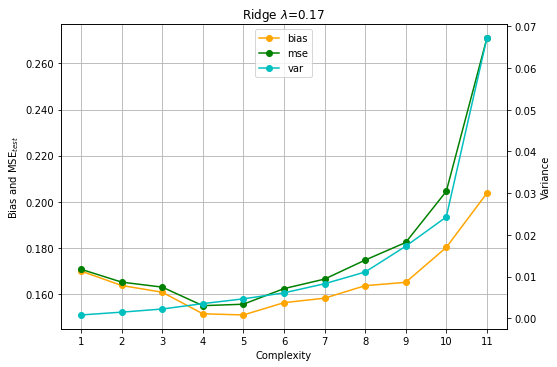

In [254]:
print("Bias: ",bias)
print("------------------------")
print("Variance: ",var)
print("------------------------")
print("Bias + variance: ",bias + var )
print("------------------------")
print("MSE test", mse)


g=0.8
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))

lns1 = ax.plot(degrees, bias_ridge[0,:],"o-", color="orange", label="bias")
lns2 = ax.plot(degrees, mse_ridge[0,:],"go-", label="mse")
ax2=ax.twinx()
lns3 = ax2.plot(degrees, var_ridge[0,:],"co-" ,label="var")
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.set_xlabel("Complexity")
ax.set_ylabel("Bias and $\mathrm{MSE}_{test}$")
ax2.set_ylabel("Variance")
ax.legend(lns, labs, loc=9)
ax.set_xticks(degrees)
ax.set_title("Ridge $\lambda$=0.17")
ax.grid()
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.03f'))
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/RIDGEbiasvariance', dpi=300)

### Ridge Cross-Val

In [38]:
#x,y = create_data(10000)
#factor = 0.4

#z0 = FrankeFunction(x, y)
#z = z0 + noise(l = len(z0),factor=factor)
#data = modelos.Dataframe(x, y)


k = np.arange(10,110,10)
n=4
lambdas = np.array([0.01, 0.1, 1, 10])
lambdas=np.array([100])
lambdas = np.array([0.17])
k = [2,4,5,8,10,20,25,40,50]
mse_20 = []
mse_lambdas = np.zeros((len(lambdas), len(k)))
for q, val in tqdm(enumerate(lambdas)):
    for i in range(100):
        mse_test=[]
        for folds in k:
            
            slots = data_slots(data.data, z, folds)
            aux_mse_test = []
            for i in range(folds):
                aux_train = np.delete(slots, i, axis=2)
                aux_test = slots[:,:,i]

                #reshape of aux_train in [samples, (x,y,z)]. We flat the slots into a 2D vector to train the model
                aux_train = aux_train.transpose(2,0,1).reshape(aux_train.shape[-1]*aux_train.shape[0], -1)
                #create dataframe with training data and model
                aux_data = modelos.Dataframe(aux_train[:,:2])
                aux_model = modelos.Ridge()
                #fitting of the aux_model
                aux_model.fit(feature_matrix=aux_data.feature_matrix(n=n), y=aux_train[:,-1], l=val)
                #predict of the aux_model
                predict = aux_model.predict(feature_matrix=aux_data.feature_matrix(data=aux_test[:,:2],n=n))
                #computation of the mse_test#
                aux_mse_test.append(MSE(predict, aux_test[:,-1]))

            mse_test.append(np.mean(aux_mse_test))
        mse_20.append(mse_test)
    mse20_mean = np.mean(mse_20, axis=0)
    mse_lambdas[q, :] = mse20_mean


1it [00:11, 11.66s/it]


No handles with labels found to put in legend.


The mse for 10 folders for different lambdas is: 
[0.17]
[0.17088785]


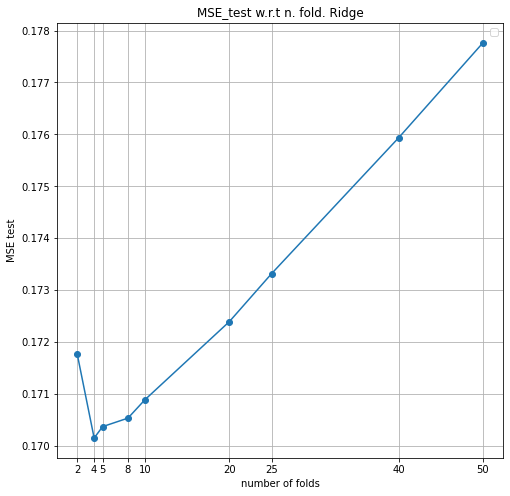

In [40]:
plt.figure(figsize=(8,8))
for i in range(len(lambdas)):
    plt.plot(np.array(k),mse_lambdas[i,:],"o-")

plt.xticks(np.array(k))
plt.title("MSE_test w.r.t n. fold. Ridge")
plt.xlabel("number of folds")
plt.ylabel("MSE test")
plt.legend()
plt.grid()

print("The mse for 10 folders for different lambdas is: ")
print(lambdas)
print(mse_lambdas[:,4])
error_ridge_crossval = np.min(mse_lambdas[0,:])

In [41]:
CV_RIDGE = mse_lambdas[0,:]

We have plotted cross-validation for different lambdas and folders, doing 20 trys for each lambda and compyting the mean. Again, the proper number of folders is 10 folders for all lambda values.
For this number of folder, the lower error is for the first value of lambda, $\lambda = 0.01$

In [1127]:
RIDGE_error_crossval = error_ridge_crossval

In [1126]:
print("mse bootstrap: ", error_ridge_bootstrap)
print("mse crossval:  ", error_ridge_crossval)

mse bootstrap:  0.1663145367548525
mse crossval:   0.16533177620791098


The MSE obtained with cross-val is lower than the mse gotten by bootstrap.

# Part e) Lasso regression


In [861]:
x,y = create_data(10000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)
data.split(z)

We will use Scikit functionality

In [43]:
from sklearn import linear_model

In [1099]:


feat_train = data.feature_matrix(data=data.x_train,n=complexity)
feat_test = data.feature_matrix(data=data.x_test, n=complexity)


lambdas = np.logspace(-5,5,num=20)
lambdas = np.array([0.0001])
degrees = np.arange(2,11,1)
mse_lambdas_lasso = np.zeros((len(lambdas), len(degrees)))
mse_train_lambdas_lasso = np.zeros((len(lambdas), len(degrees)))
mse_test_ridge = np.zeros((len(lambdas),len(degrees)))
mse_train_ridge = np.zeros((len(lambdas),len(degrees)))
mse_test_ols = np.zeros_like(degrees)
for j, comp in enumerate(degrees):
    feat_train = data.feature_matrix(data=data.x_train,n=comp)
    feat_test = data.feature_matrix(data=data.x_test, n=comp)
    for i, val in enumerate(lambdas):
        lasso = linear_model.Lasso(alpha = val)
        lasso.fit(X=feat_train,y=data.y_train)
        lasso_pred=lasso.predict(feat_test)
        lasso_pred_train=lasso.predict(feat_train)
        mse_lambdas_lasso[i,j] = MSE(lasso_pred, data.y_test)
        mse_train_lambdas_lasso[i,j] = MSE(lasso_pred_train, data.y_train)

        ridge = modelos.Ridge()
        ridge.fit(feature_matrix=feat_train,y=data.y_train, l=val)
        ridge_pred=ridge.predict(feat_test)
        ridge_pred_train=ridge.predict(feat_train)
        mse_test_ridge[i,j] = MSE(ridge_pred, data.y_test)
        mse_train_ridge[i,j] = MSE(ridge_pred_train, data.y_train)
    ols = modelos.OLS()
    ols.fit(feature_matrix=feat_train, y=data.y_train)
    predict = ols.predict(feature_matrix=feat_test)
    mse_test_ols[j]= MSE(predict, data.y_test)
#print(mse_lambdas_lasso)


/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.922062756955, tolerance: 0.016621349364808316
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.191959065736853, tolerance: 0.016621349364808316
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.954132252962253, tolerance: 0.016621349364808316
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoq

In [1101]:
LASSO_error = mse_lambdas_lasso[0, 2]

0.1681450037741157

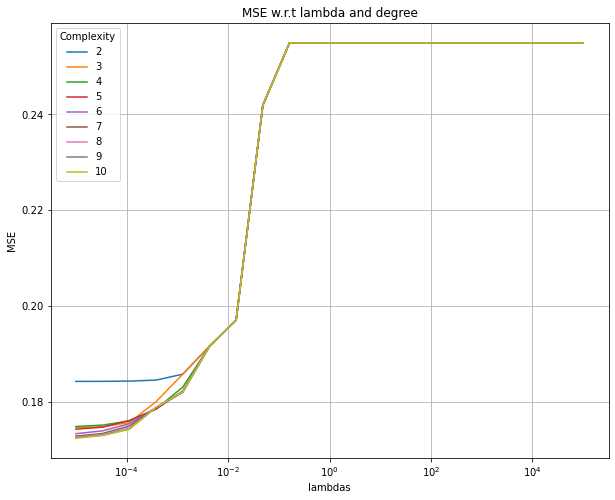

In [875]:
plt.figure(figsize=(10,8))
for i in range(len(degrees)):
    plt.plot(lambdas,mse_lambdas_lasso[:,i], label=degrees[i])

plt.xscale("log")
plt.xlabel("lambdas")
plt.ylabel("MSE")
plt.title("MSE w.r.t lambda and degree")
plt.legend(title="Complexity")
plt.grid()


For all the degrees, le MSE converges to the same for larger enough lambdas. Also, we get larger error for Lasso than for Ridge.

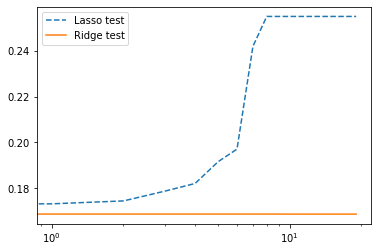

In [886]:
#plt.plot(mse_train_lambdas_lasso[:,-3],"--", label="Lasso train")
plt.plot(mse_lambdas_lasso[:,-3],"--", label="Lasso test")
plt.plot(mse_test_ridge[:,-3],label="Ridge test")
#plt.plot(lambdas,mse_train_ridge[:,-3],label="Ridge train")
plt.xscale("log")
plt.legend()
#lambdas

We get the lower error for the first lambda, $\lambda = 0.0001$

## Ridge in function of complexity and lambda

In the following code, I compute the MSE_test in function of the complexity of the model and lambda. We observe that, for diffeent degrees, we get
different shapes. The plot showed are the mse in function of the lambda parameter for each degree z-scaled, in order to be able to compare the shapes. We will use degree 8.

In [887]:
degrees = np.arange(4,10,1)
lambdas = np.logspace(-4,4,num=100)
ridge = modelos.Ridge()
ols = modelos.OLS()


mse_ridge_total = np.zeros((len(degrees), len(lambdas)))
mse_lasso_total = np.zeros((len(degrees), len(lambdas)))
for j, complexity in enumerate(degrees):
    feat_train = data.feature_matrix(data=data.x_train,n=complexity)
    feat_test = data.feature_matrix(data=data.x_test, n=complexity)

    mse_ridge_lambdas = np.zeros_like(lambdas)
    mse_lasso_lambdas = np.zeros_like(lambdas)
    for i, val in enumerate(lambdas):
        lasso = linear_model.Lasso(alpha = val)
        lasso.fit(X=feat_train,y=data.y_train)
        lasso_pred=lasso.predict(feat_test)
        mse_lasso_lambdas[i] = MSE(lasso_pred, data.y_test)

        ridge.fit(feature_matrix=feat_train,y=data.y_train, l=val)
        ridge_pred=ridge.predict(feat_test)
        mse_ridge_lambdas[i] = MSE(ridge_pred, data.y_test)
    
    mse_ridge_total[j ,:] = mse_ridge_lambdas[:] 
    mse_lasso_total[j ,:] = mse_lasso_lambdas[:] 


/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.34440811040577, tolerance: 0.17082651490958106
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.9042962992678, tolerance: 0.17082651490958106
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.187145488010174, tolerance: 0.17082651490958106
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoq

Text(0, 0.5, 'MSE_test')

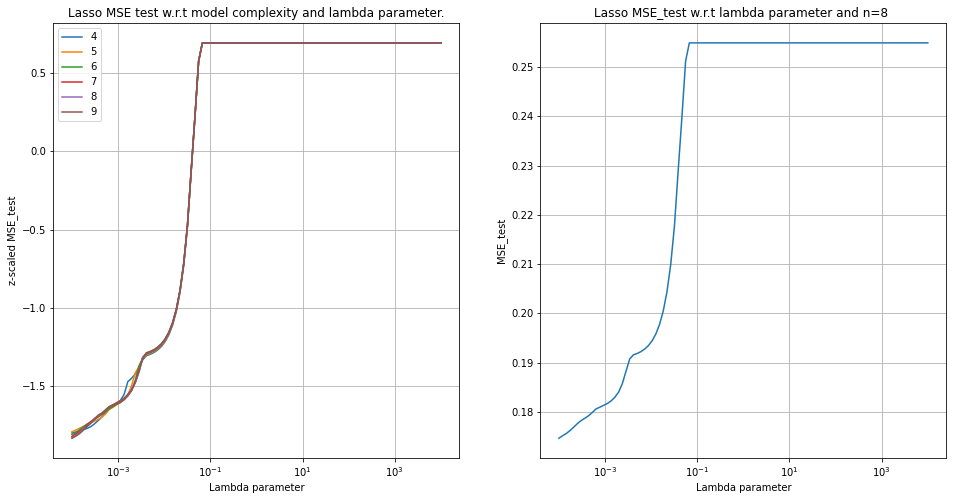

In [893]:
fig, ax = plt.subplots(1,2, figsize=((16,8)))
for i in range(mse_lasso_total.shape[0]):
    ax[0].plot(lambdas, matrix[i,:])
ax[0].legend(degrees)
ax[0].set_xscale("log")
ax[0].grid()
ax[0].set_title("Lasso MSE test w.r.t model complexity and lambda parameter.")
ax[0].set_xlabel("Lambda parameter")
ax[0].set_ylabel("z-scaled MSE_test")
ax[1].plot(lambdas, mse_lasso_total[-3,:])
ax[1].set_xscale("log")
ax[1].grid()
ax[1].set_title("Lasso MSE_test w.r.t lambda parameter and n=8 ")
ax[1].set_xlabel("Lambda parameter")
ax[1].set_ylabel("MSE_test")

### Lasso bootstrap for different datapoints

Following cell takes to much time

### Lasso Bias-variance tradeoff for lambdas 0.01, 0.1, 1, 10

In [241]:

x,y = create_data(1000)
factor = 0.4

z0 = FrankeFunction(x, y)
z = z0 + noise(l = len(z0),factor=factor)
data = modelos.Dataframe(x, y)
data.split(z, train_size=0.7)
lambdas = np.array([0.001, 0.005,  0.1])
lambdas = np.array([0.0001, 0.001, 0.01])

lambdas = np.array([0.001])

resamples = 100

degrees = np.arange(1,12,1)
train_data = np.append(data.x_train, data.y_train[:, np.newaxis], axis = 1)
bootresult = bootstrap(train_data, bootnum=resamples).T

predictions = np.zeros((resamples, len(degrees), len(data.y_test)))

bias_lasso = np.zeros((len(lambdas), len(degrees)))
var_lasso = np.zeros((len(lambdas), len(degrees)))
mse_lasso = np.zeros((len(lambdas), len(degrees)))
for k, val in enumerate(lambdas):
    for i in range(resamples):
        for j, grado in enumerate(degrees):
            lasso = linear_model.Lasso(alpha =val)
            #lasso = modelos.Ridge()
            data_aux = modelos.Dataframe(x=bootresult[0,:,i], y=bootresult[1,:,i])
            y_train = bootresult[2,:,i]
            
            lasso.fit(X=data_aux.feature_matrix(n=grado), y=y_train)
            #lasso.fit(feature_matrix=data_aux.feature_matrix(n=grado), y=y_train, l=val)
            predictions[i,j,:] = lasso.predict(X=data_aux.feature_matrix(data=data.x_test, n=grado))

    bias = np.mean((data.y_test - np.mean(predictions, axis=0, keepdims=True))**2, axis=2)
    var = np.mean(np.mean((predictions - np.mean(predictions, axis=0, keepdims=True))**2, axis=0), axis=1)
    mse = np.mean(np.mean((data.y_test - predictions)**2, axis=-1), axis=0)

    bias_lasso[k,:] = bias
    var_lasso[k,:] = var
    mse_lasso[k, :] = mse



/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.044581085350557714, tolerance: 0.017750019811736253
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03996640638331428, tolerance: 0.017683117510991084
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03854982918466021, tolerance: 0.017684715600957156
  model = cd_fast.enet_coordinate_descent(
/Us

[0.1788558  0.16927119 0.16950268 0.16992058 0.17017214 0.17017368
 0.17058406 0.17130482 0.17203364 0.17257289 0.17290199 0.17311075
 0.1732394  0.17328059 0.17332712 0.17334866 0.17336526 0.17337739]
Lower error:  0.16950268478671568


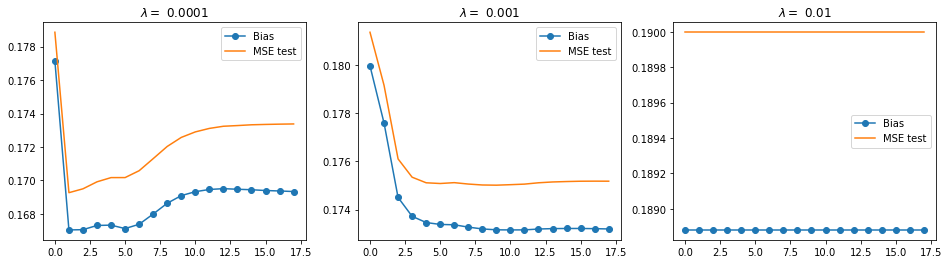

In [1115]:
fig, ax = plt.subplots(1,3 ,figsize=(16,4))   
for i in range(bias_lasso.shape[0]):
    ax[i].plot(bias_lasso[i,:],'o-', label="Bias")
    ax[i].plot(mse_lasso[i,:],label="MSE test")
    ax[i].set_title("$\lambda =$ "+ str(lambdas[i]))
    ax[i].legend()

print(mse_lasso[0,:])
print("Lower error: ", np.min(mse_lasso[0,2]))

In [1116]:
LASSO_boots = mse_lasso[0,2]

For small $\lambda$ Lasso works, but as we icnreasse it the error and bias collapses to a flat value. So we need to use a very little value.
In the following plot we can see the Bias-Variance tradeoff.


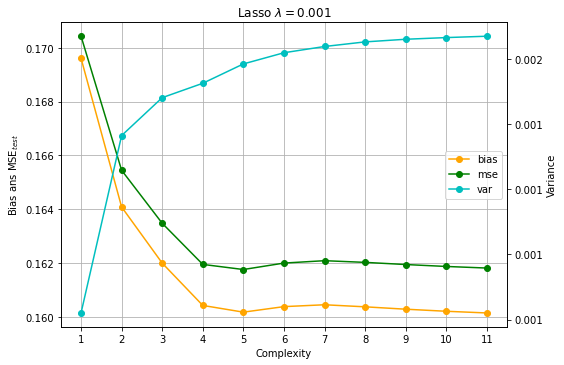

In [246]:
g=0.8
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))

#fig, ax = plt.subplots(1, figsize=(8,8))
lns1 = ax.plot(degrees, bias_lasso[0,:],"o-", color="orange", label="bias")
lns2 = ax.plot(degrees, mse_lasso[0,:],"go-", label="mse")
ax2=ax.twinx()
lns3 = ax2.plot(degrees, var_lasso[0,:],"co-" ,label="var")
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.set_xlabel("Complexity")
ax.set_ylabel("Bias ans $\mathrm{MSE}_{test}$")
ax2.set_ylabel("Variance")
ax.set_xticks(degrees)
ax.legend(lns, labs, loc=5)
ax.set_title("Lasso $\lambda = 0.001$")
y_labels = ax.get_yticks()
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.03f'))
ax.grid()
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/Lassobiasvariance', dpi=300)

### Lasso Cross-Validation

!!! I AM USING 1000 DATAPOINTS AND DEGREE 4. IF NOT IT IS TO EXPENSIVE TO RUN.

In [44]:

#x,y = create_data(1000)
factor = 0.4

#z0 = FrankeFunction(x, y)
#z = z0 + noise(l = len(z0),factor=factor)
#data = modelos.Dataframe(x, y)
#data.split(z, train_size=0.7)


k = np.arange(10,110,10)
n=4
lambdas = np.array([0.0001, 0.001, 0.01])
lambdas = np.array([0.0001])
k = [2,4,5,8,10,20,25,40,50]
mse_20 = []
mse_lambdas = np.zeros((len(lambdas), len(k)))
for q, val in tqdm(enumerate(lambdas)):
    for i in range(100):
        mse_test=[]
        for folds in k:
            
            slots = data_slots(data.data, z, folds)
            aux_mse_test = []
            for i in range(folds):
                aux_train = np.delete(slots, i, axis=2)
                aux_test = slots[:,:,i]

                #reshape of aux_train in [samples, (x,y,z)]. We flat the slots into a 2D vector to train the model
                aux_train = aux_train.transpose(2,0,1).reshape(aux_train.shape[-1]*aux_train.shape[0], -1)
                #create dataframe with training data and model
                aux_data = modelos.Dataframe(aux_train[:,:2])
                aux_model = linear_model.Lasso(alpha =val)
                #fitting of the aux_model
                aux_model.fit(X=aux_data.feature_matrix(n=n), y=aux_train[:,-1])
                #predict of the aux_model
                predict = aux_model.predict(X=aux_data.feature_matrix(data=aux_test[:,:2],n=n))
                #computation of the mse_test#
                aux_mse_test.append(MSE(predict, aux_test[:,-1]))

            mse_test.append(np.mean(aux_mse_test))
        mse_20.append(mse_test)
    mse20_mean = np.mean(mse_20, axis=0)
    mse_lambdas[q, :] = mse20_mean


0it [00:00, ?it/s]/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35814343218591205, tolerance: 0.012363625431132022
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.912297524866247, tolerance: 0.012241337840777647
  model = cd_fast.enet_coordinate_descent(
/Users/ijpoquet/.conda/envs/CompSci_project1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7859559061983958, tolerance: 0.01768774718130228
  model = cd_fast.enet_coordinate

The mse for 9 folders for different lambdas is: 
[0.0001]
[0.16928237]


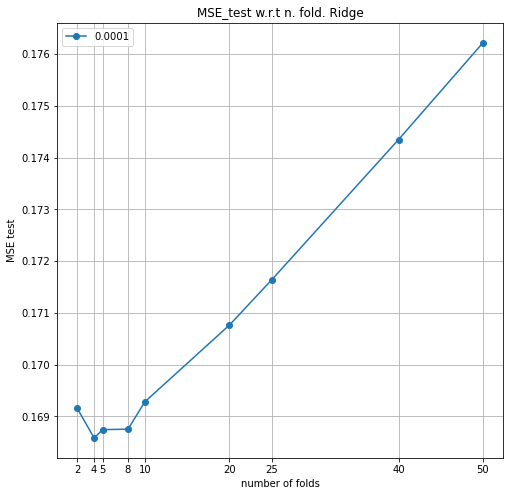

In [1129]:
plt.figure(figsize=(8,8))
for i in range(len(lambdas)):
    plt.plot(np.array(k),mse_lambdas[i,:],"o-", label=lambdas[i])

plt.xticks(np.array(k))
plt.title("MSE_test w.r.t n. fold. Ridge")
plt.xlabel("number of folds")
plt.ylabel("MSE test")
plt.legend()
plt.grid()

print("The mse for 9 folders for different lambdas is: ")
print(lambdas)
print(mse_lambdas[:,4])
error_ridge_crossval = np.min(mse_lambdas[0,:])

We observe again that the lower error is for smaller $\lambda$ = 0.0001

In [46]:
CV_LASSO = mse_lambdas

In [45]:
LASSO_error_crossval = mse_lambdas

In [1158]:
with open('table_part1.txt', 'w') as f:
    f.write(tabulate(data, headers=col_names))

## OLS vs Ridge vs Lasso with cross-validation.

I have computed normal, bootstraping and cross-val for the three methods. In the following print is showed the result.

In [1157]:
from tabulate import tabulate

data = [['No resampling', str(OLS_error), str(RIDGE_error), str(LASSO_error) ],
['Bootstraping', str(OLS_error_boots), str(RIDGE_error_boot), str(LASSO_boots)],
['Cross-validation', str(OLS_error_crossval), str(RIDGE_error_crossval), str(LASSO_error_crossval)]]



col_names =["OLS","Ridge \n l = 100","Lasso \n l = 0.0001"]

print(tabulate(data, headers=col_names))


                       OLS      Ridge          Lasso
                               l = 100     l = 0.0001
----------------  --------  ----------  -------------
No resampling     0.174618    0.1713         0.168145
Bootstraping      0.176295    0.176582       0.169503
Cross-validation  0.168582    0.165332       0.168745


In [125]:
import seaborn as sns
matrix = np.array([[0.17024, 0.16524, 0.15479], [0.17272, 0.16852, 0.15564], [0.17015, 0.17555, 0.161974]])


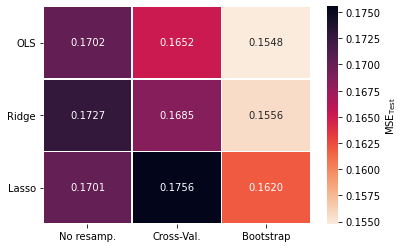

In [142]:
fig=sns.heatmap(matrix, annot=True, fmt=".4f", linewidth=.5,
            xticklabels = ['No resamp.','Cross-Val.','Bootstrap'],
            yticklabels = ['OLS','Ridge','Lasso'], cmap='rocket_r',
            cbar_kws={'label':'$\mathrm{MSE_{Test}}$'})
plt.yticks(rotation=0)
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/TableComparation', dpi=300)

In [140]:
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/TableComparation', dpi=300)

<Figure size 432x288 with 0 Axes>

### 3D PLOTS

In [587]:
#x = np.linspace(0,1,100)
#y = np.linspace(0,1,100)
x= np.sort(np.random.uniform(0,1,100))
y = np.sort(np.random.uniform(0,1,100))
a, b = np.meshgrid(x,y)
z0 = FrankeFunction(a,b)
aux = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6]:
    z = z0 +  noise(z.shape, factor = i)
    data = modelos.Dataframe(x, y, grid=True)
    data.split(z.flatten())
    model = modelos.OLS()
    model.fit(data.feature_matrix(data=data.x_train,n=8), y=data.y_train)
    predict = model.predict(data.feature_matrix(data=data.x_test, n=8))
    aux.append(MSE(predict, data.y_test))

In [632]:
x= np.sort(np.random.uniform(0,1,100))
y = np.sort(np.random.uniform(0,1,100))
a, b = np.meshgrid(x,y)
z0 = FrankeFunction(a,b)

z = z0 +  noise(z0.shape, factor = 1)
data = modelos.Dataframe(x, y, grid=True)
data.split(z.flatten())
model = modelos.OLS()
model.fit(data.feature_matrix(data=data.x_train,n=8), y=data.y_train)
predict = model.predict(data.feature_matrix(data=data.x_test, n=8))


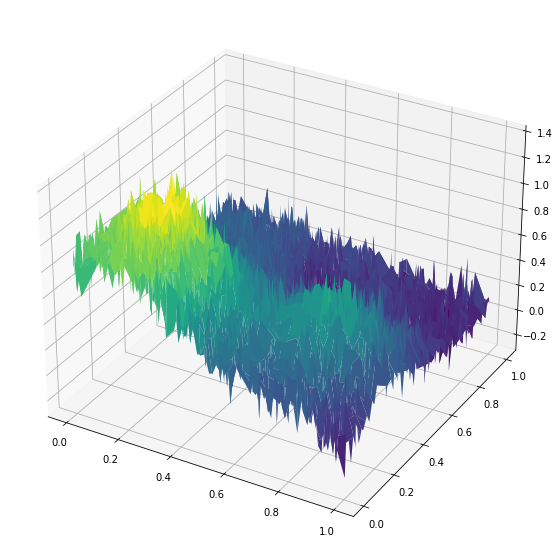

In [633]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.contour3D(x,y,z, 100)
ax.plot_surface(a,b,z, cmap='viridis')
#ax.plot3D(x, y, z)
#surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)

Text(0.5, 0, 'f(x,y)')

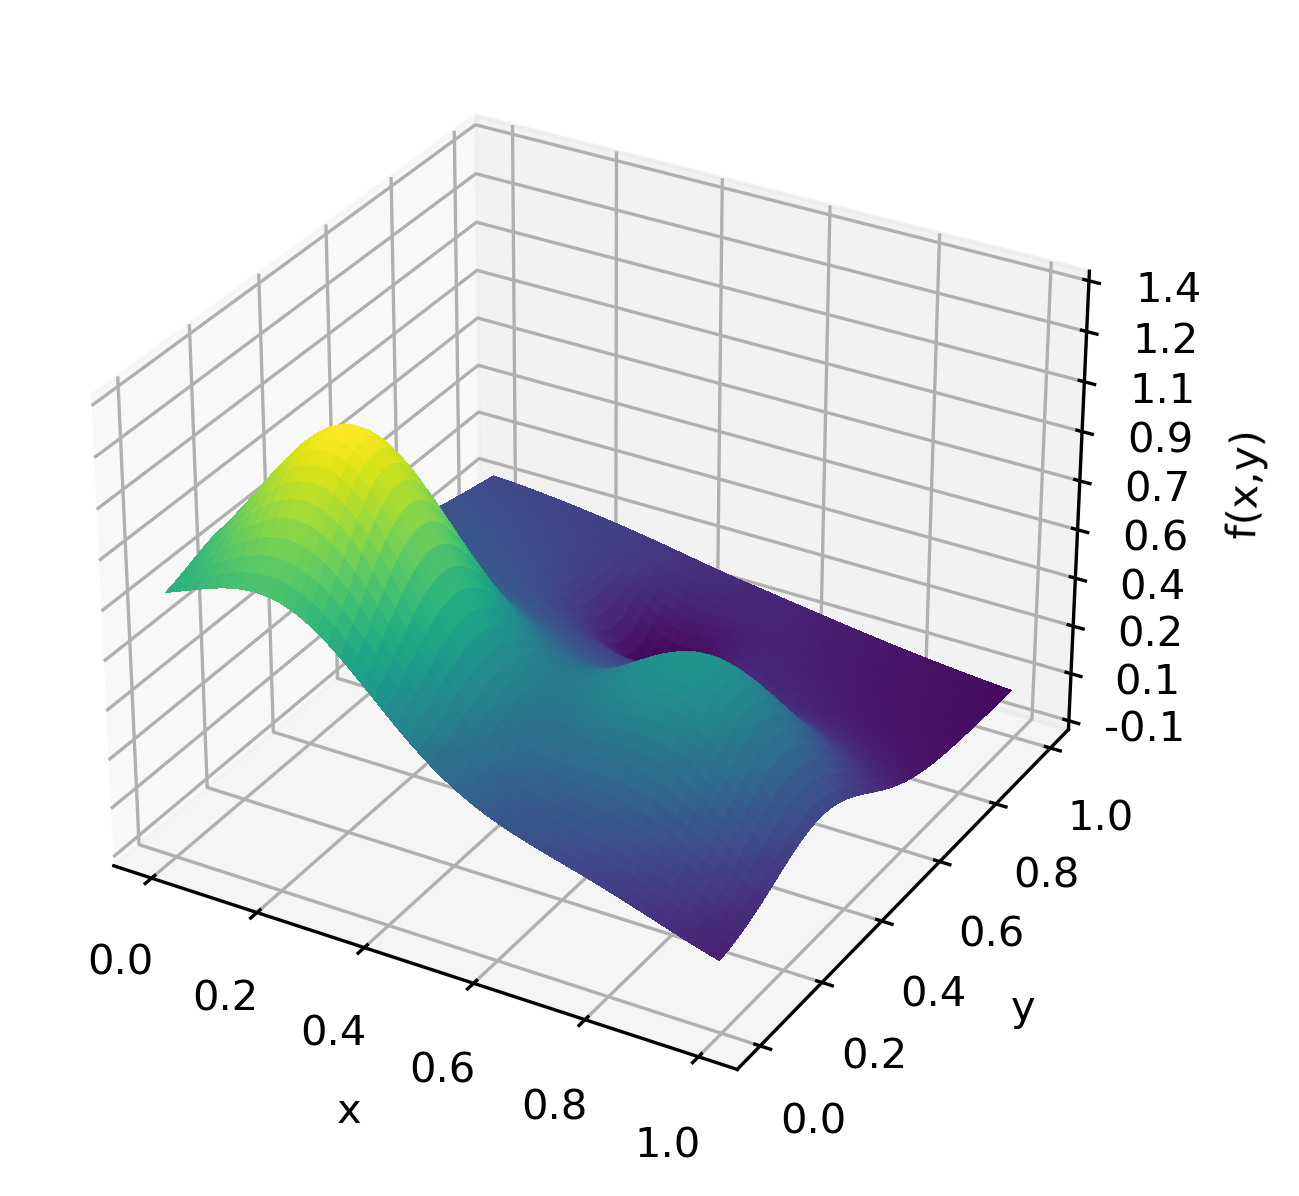

In [108]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

g=0.7
fig = plt.figure(figsize=(g*10,g*7))
ax = fig.gca(projection='3d')

# Make data. Use alternatively the uniform distribution
x = np.arange(0, 1, 0.005)
y = np.arange(0, 1, 0.005)
# Using numpy's meshgrid (why?)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
fig = plt.figure(figsize=(g*10,g*7))
ax = fig.gca(projection='3d')

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
# Add a color bar which maps values to colors.
#fig.colorbar(surf, cax=cax, orientation='horizontal')